In [1]:
#install & load the required packages
library(readxl)
library(ggplot2)
library(caret)
library(dplyr)

Loading required package: lattice


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
#load dataset
data <- read_excel("C:/Users/Ferina/Downloads/online_retail.xlsx")
head(data)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom


In [7]:
#clean the data

# Keep only rows with valid (positive) Quantity and Price
data <- data %>%
filter(Quantity > 0, Price > 0) %>%
  
# Create a new column 'TotalPrice' as Quantity × Price
mutate(TotalPrice = Quantity * Price)

# Show the first few cleaned rows
head(data)

Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
<chr>,<chr>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>,<dbl>
489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.6


In [9]:
#Create RFM Summary Table
rfm_data <- data %>%
group_by(`Customer ID`) %>%
summarise(
Frequency = n(),                     
Monetary = sum(TotalPrice),         
AvgPrice = mean(Price)              
) %>%
na.omit()  

# View the RFM table
head(rfm_data)

Customer ID,Frequency,Monetary,AvgPrice
<dbl>,<int>,<dbl>,<dbl>
12346,33,372.86,6.253333
12347,71,1323.32,2.295070
12348,20,222.16,0.719500
12349,102,2671.14,8.581765
12351,21,300.93,2.355238
12352,18,343.80,3.033333


In [11]:
#Normalize the RFM Data

# Normalize only numeric features (excluding Customer ID)
preproc <- preProcess(rfm_data[, -1], method = c("center", "scale"))

norm_data <- predict(preproc, rfm_data[, -1])

# View first few normalized rows
head(norm_data)

Frequency,Monetary,AvgPrice
<dbl>,<dbl>,<dbl>
-0.30459212,-0.18793895,-0.017742923
-0.11651652,-0.08131917,-0.037205940
-0.36893377,-0.20484403,-0.044953115
0.03691358,0.06987527,-0.006293885
-0.36398441,-0.19600784,-0.036910092
-0.37883249,-0.19119881,-0.033575857


In [13]:
#K-Means Clustering
set.seed(123)  

# Run K-Means with 3 clusters
kmeans_result <- kmeans(norm_data, centers = 3, nstart = 25)

# Add cluster labels to the original RFM table
rfm_data$Cluster <- as.factor(kmeans_result$cluster)

# View a sample of clustered data
head(rfm_data)

Customer ID,Frequency,Monetary,AvgPrice,Cluster
<dbl>,<int>,<dbl>,<dbl>,<fct>
12346,33,372.86,6.253333,3
12347,71,1323.32,2.295070,3
12348,20,222.16,0.719500,3
12349,102,2671.14,8.581765,3
12351,21,300.93,2.355238,3
12352,18,343.80,3.033333,3


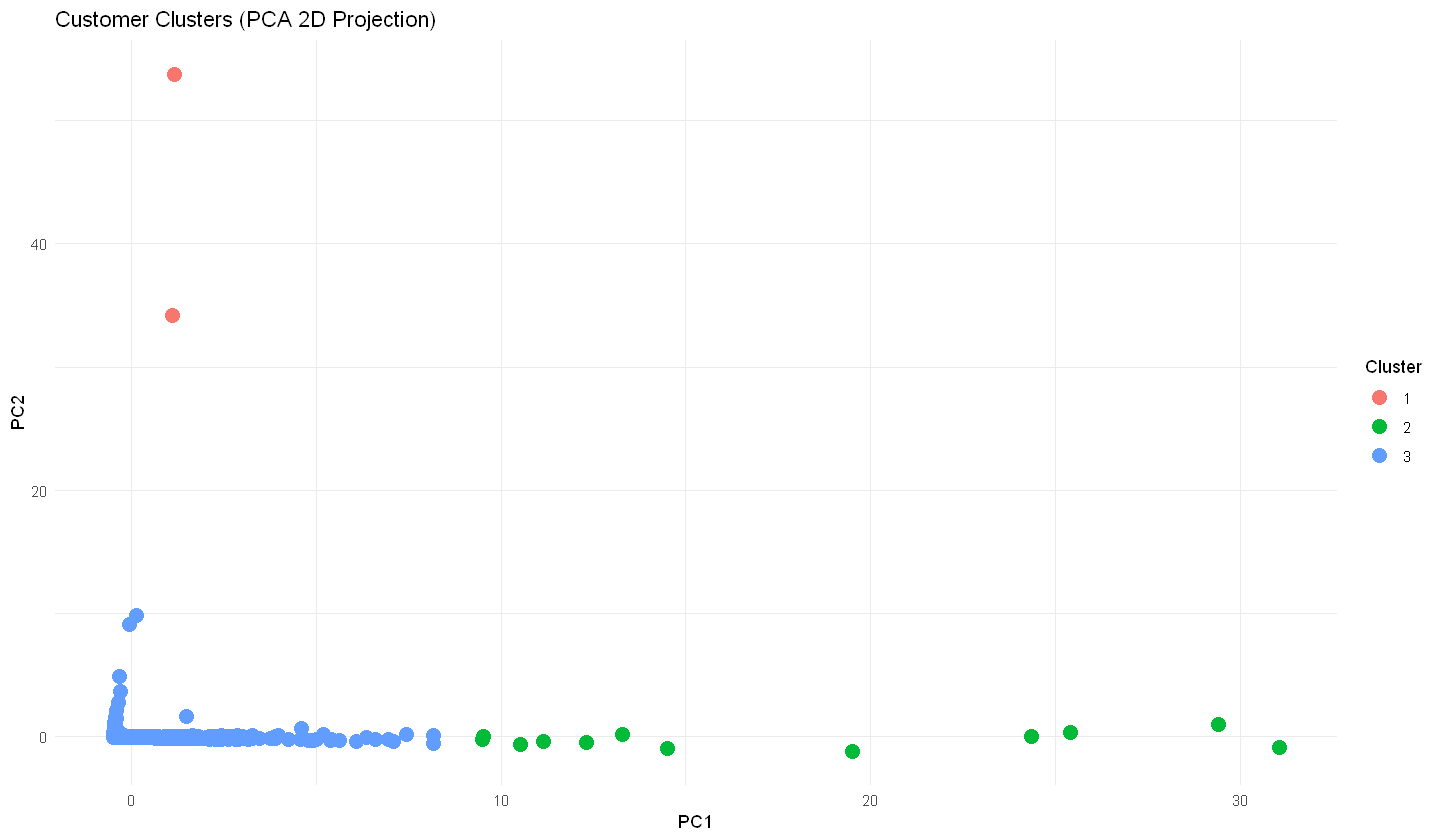

In [25]:
#Visualize the Clusters
# Visualize PCA clusters
ggplot(pca_data, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 4) +
  labs(title = "Customer Clusters (PCA 2D Projection)") +
  theme_minimal()
